<a href="https://colab.research.google.com/github/mickeykubo/dash/blob/master/fastai1_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fast.ai のインストールとテスト on Google Colab 


In [0]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai
!pip3 install Pillow==4.0.0

# 訓練モジュール






---



---




In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)

In [0]:
data = ImageDataBunch.from_folder(path)

In [0]:
model = simple_cnn((3,16,16,2))

In [0]:
learn = Learner(data,model)

In [0]:
learn.fit(1)

epoch,train_loss,valid_loss
1,0.112487,0.107907


In [0]:
learn.metrics=[accuracy]
learn.fit(1)

epoch,train_loss,valid_loss,accuracy
1,0.071069,0.074092,0.974975


In [0]:
learn.fit_one_cycle(1,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.057188,0.032573,0.987733


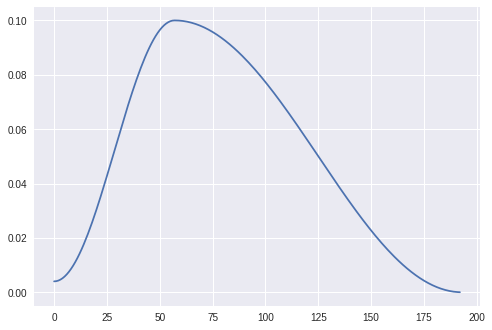

In [0]:
learn.recorder.plot_lr()

In [0]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 83897833.13it/s]


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.163807,0.111480,0.961236


In [0]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (12396 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: /root/.fastai/data/mnist_sample
x: ImageItemList (12396 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList
y: CategoryList (2038 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: /root/.fastai/data/mnist_sample
x: ImageItemList (2038 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: /root/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, d

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


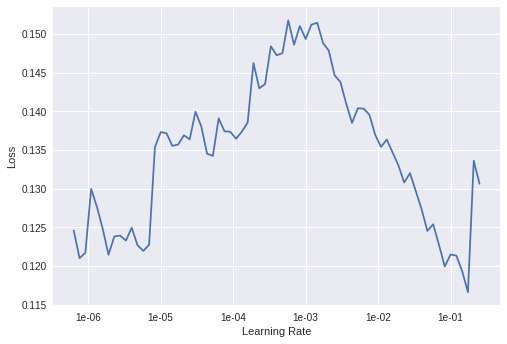

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.035869,0.015274,0.995584


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1,max_lr=(1e-4,1e-3,1e-2) )

epoch,train_loss,valid_loss,accuracy
1,0.017484,0.005878,0.998037


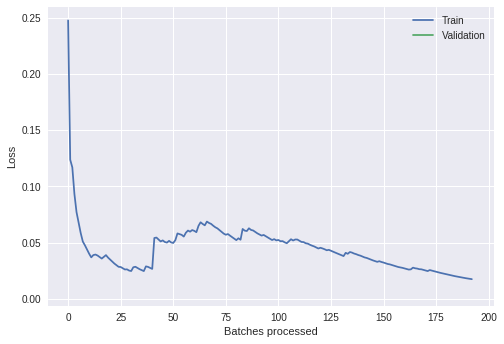

In [0]:
learn.recorder.plot_losses()

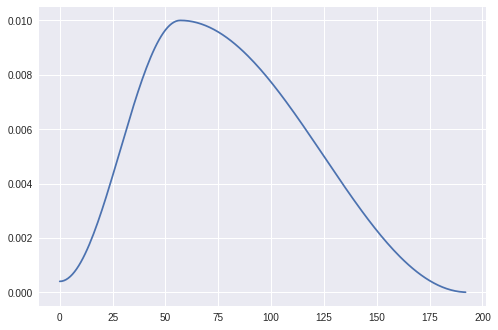

In [0]:
learn.recorder.plot_lr()

# 表形式データの学習


In [0]:
from fastai import *

In [0]:
from fastai.tabular import * 

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)

In [0]:
df = pd.read_csv(path/'adult.csv')

In [0]:
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(df)-2000, len(df)) #検証用データのインデックスを準備．
dep_var = '>=50k' #従属変数名とカテゴリー変数が格納されている列リストを準備．
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [0]:
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(path, df, dep_var, 
valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [0]:
#深層学習(PyTorch)の学習器インスタンスlearnを生成し，fitメソッドで訓練．引数はエポック数と学習率．
learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.338148,0.316442,0.853000


# 画像データの例

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.CIFAR)
data = ImageDataBunch.from_folder(path)

In [0]:
#learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn = create_cnn(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(1)

# 協調フィルタリングの例

In [0]:
from fastai.collab import * 

In [0]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings)

In [0]:
learn = collab_learner(data, n_factors=50, y_range=(0.,5.))

In [0]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss
1,2.443485,2.030991
2,1.125733,0.664717
3,0.750798,0.635108
4,0.633702,0.631200
5,0.574826,0.627643
